In [69]:
from __future__ import division, print_function

import skfuzzy as fuzz
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [70]:
original_image = cv2.imread('mollahoseini-karimi.jpg')
original_image = original_image[:,:256]
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)


In [71]:
vectorized = img.reshape((-1, 3))
#vectorized = np.float32(vectorized)

In [72]:
vectorized_t = np.transpose(vectorized)
vectorized_t #dimention = (3,n).... 3 is number of features , n is number of data

array([[ 86,  73,  73, ...,  30,  30,  30],
       [103,  90,  90, ...,  43,  43,  43],
       [ 59,  46,  46, ...,  34,  34,  34]], dtype=uint8)

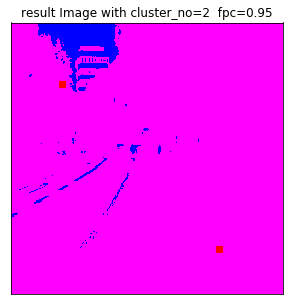

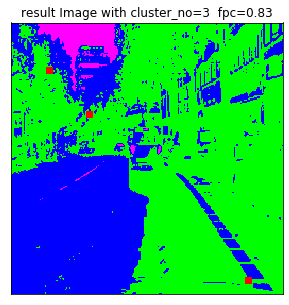

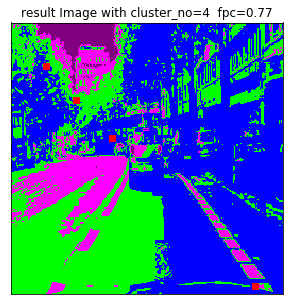

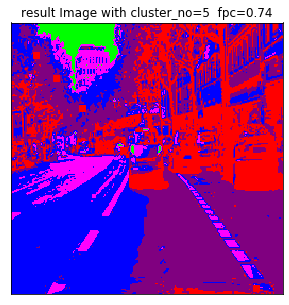

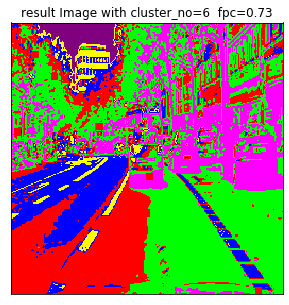

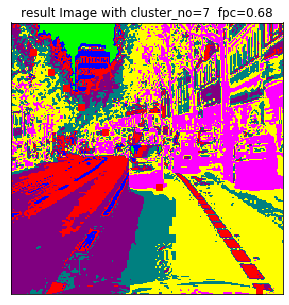

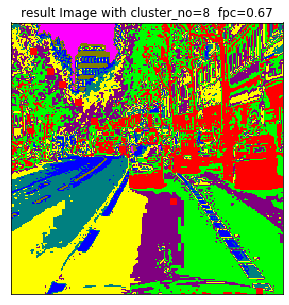

In [77]:
fpcs = []
figure_size1 = 5
color = np.array([[0,0,255],[255,0,255],[0,255,0],[128,0,128],[255,0,0],[255,255,0],[0,128,128],[128,128,0],[0,255,255],[0,0,0]])

for ncenters in range(2,9):
   
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vectorized_t, ncenters, 2, error=0.005, maxiter=1000, init=None)
    
    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    
    ####################
    center1 = np.uint8(np.transpose(cntr))
    center1 = np.copy(color[:ncenters])
    #center = center + 50   
    
    res1 = center1[cluster_membership]
    #np.transpose(vectorized_t).reshape(img.shape)
    result_image1 = res1.reshape((img.shape))
    ####################
    
    plt.figure(figsize=(figure_size1,figure_size1))
    plt.imshow(result_image1)
    plt.title('result Image with cluster_no=%i  fpc=%.2f'%(ncenters,fpc)), plt.xticks([]), plt.yticks([])
    

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        plt.plot(pt[0], pt[1], 'rs')

    plt.show()

#fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

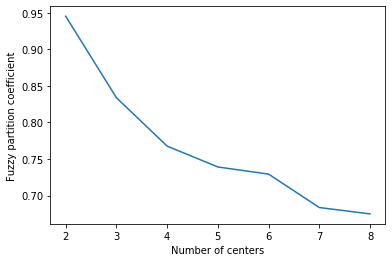

In [79]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:9], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")